# Assignment 3 

## Objective

The goal is to investigate supervised learning algorithms for article classification on BBC news datasets using NB, kNN, SVM, and NNs. 

## Task 1: Exploratory Data Analytics

### (a) Feature vectorization and summary table

In [362]:
# Load libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('train.csv')

# df info
print(df.head(), '\n') # glimpse first few rows
print(df.shape, '\n') # 1000 rows, 3 columns
print(df.info(), '\n') # no missing values 
print(df['Category'].value_counts()) # even distribution of categories


   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment 

(428, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  428 non-null    int64 
 1   Text       428 non-null    object
 2   Category   428 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.2+ KB
None 

Category
tech             216
entertainment    212
Name: count, dtype: int64


In [363]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text']) # USE X_tfidf FOR MODEL BUILDING

# Print num articles and features
print("Number of articles:", X_tfidf.shape[0])
print("Number of features (unique words):", X_tfidf.shape[1])

# Show features for 5 articles
feature_names = tfidf_vectorizer.get_feature_names_out()
sample_df = pd.DataFrame(
    X_tfidf[:5].toarray(),
    columns=feature_names[:]
)
sample_df['ArticleId'] = df['ArticleId'][:5].values
sample_df['Category'] = df['Category'][:5].values

print("\nSample of 5 articles with TF-IDF features (first 10 shown):\n")
print(sample_df)

Number of articles: 428
Number of features (unique words): 13518

Sample of 5 articles with TF-IDF features (first 10 shown):

    00       000  000th  001st  0051  007  0100  0130  028   05  ...  zombies  \
0  0.0  0.020115    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
1  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
2  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
3  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   
4  0.0  0.000000    0.0    0.0   0.0  0.0   0.0   0.0  0.0  0.0  ...      0.0   

   zone  zonealarm  zones  zoom  zooms   zooropa  zorro  ArticleId  \
0   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1976   
1   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1797   
2   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1866   
3   0.0        0.0    0.0   0.0    0.0  0.000000    0.0       1153   
4   0.0        0.0    0.0   0.0    0

Explanation:

We use `TfidfVectorizer` to convert the news articles into numerical feature vectors based on the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme. TF-IDF computes a value for each word in each article based on how frequently the word appears in that article (term frequency) and how rare it is across the entire dataset (inverse document frequency). This helps highlight words that are important for distinguishing one article from another, while down-weighting common words that appear across most documents. 

We choose TF-IDF for model building because it generally improves the performance of classification algorithms like Naive Bayes, kNN, SVM, and Neural Networks by emphasizing informative, distinguishing words. We used TF-IDF in task 1a so that our feature vectors match what will be used by our classifiers. 

However, in task 1b, we use `CountVectorizer` (which gives simple word occurrence counts) for term frequency analysis and plots. This is because term frequency plots are most meaningful when they show raw counts of how often each word appears, which is standard for exploratory data analysis of text. 

Note that news bodies were lower-cased with removal of stop words and special characters, so we do not have to do any further data preprocessing. 

### (b) Term Frequency Analysis and Plots (Counts)


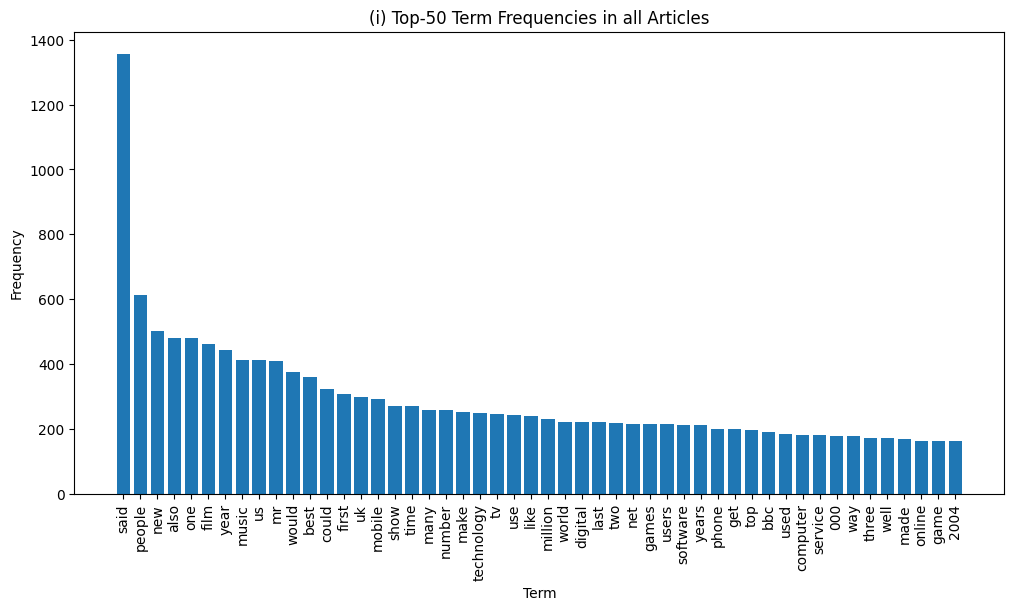

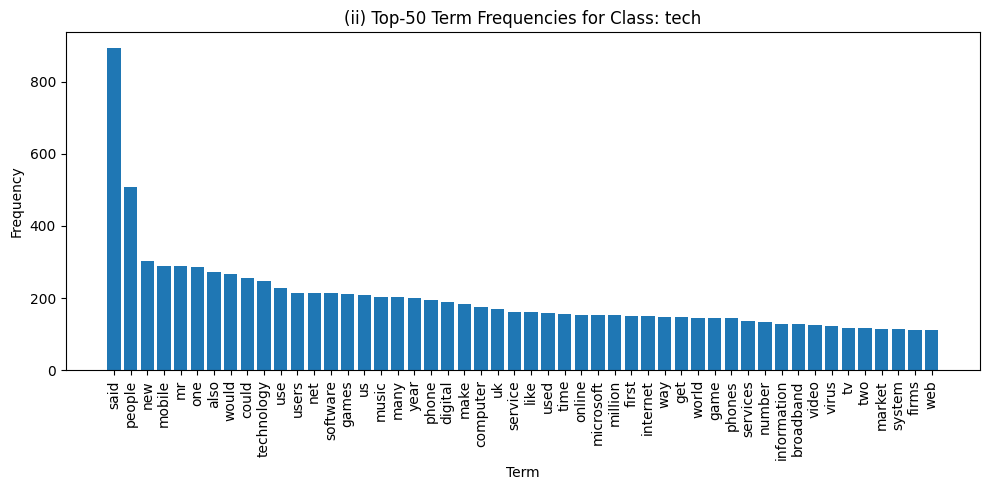

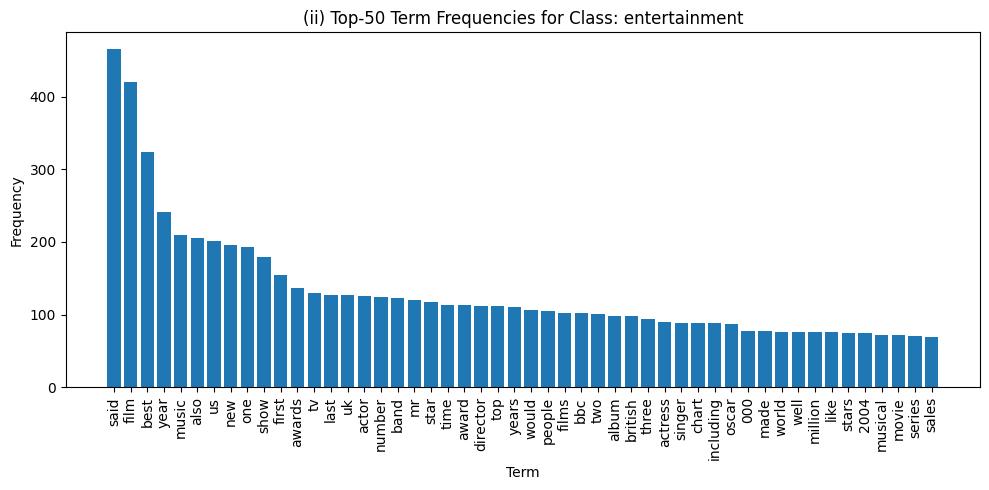

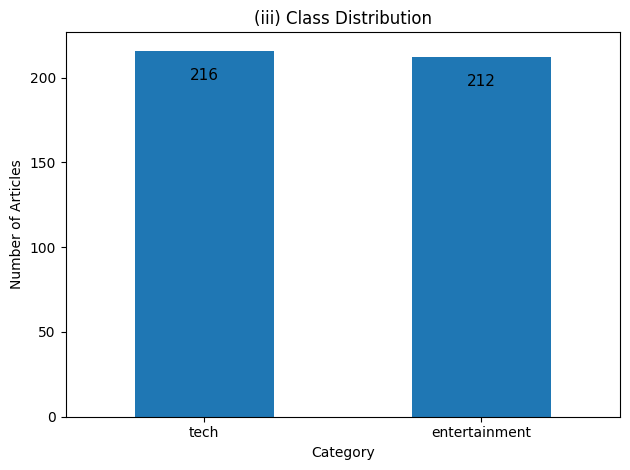

In [364]:
# Raw counts
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(df['Text'])
word_counts = X_counts.sum(axis=0).A1
terms = count_vectorizer.get_feature_names_out()

### i) Top-50 term distribution
top_50_indices = word_counts.argsort()[::-1][:50]
top_50_terms = terms[top_50_indices]
#print(top_50_terms)
top_50_counts = word_counts[top_50_indices]
#print(top_50_counts)
plt.figure(figsize=(12, 6))
plt.bar(top_50_terms, top_50_counts)
plt.xticks(rotation=90)
plt.title("(i) Top-50 Term Frequencies in all Articles")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout
plt.show()

### ii) Term frequency per class
for cat in df['Category'].unique():
    mask = df['Category'] == cat
    class_counts = X_counts[mask.to_numpy()].sum(axis=0).A1
    top_50_indices = class_counts.argsort()[::-1][:50]
    plt.figure(figsize=(10, 5))
    plt.bar(terms[top_50_indices], class_counts[top_50_indices])
    plt.xticks(rotation=90)
    plt.title(f"(ii) Top-50 Term Frequencies for Class: {cat}")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
### iii) Class distribution
class_counts = df['Category'].value_counts()
ax = class_counts.plot(kind='bar')
plt.title('(iii) Class Distribution')
plt.ylabel('Number of Articles')
plt.xlabel('Category')
plt.xticks(rotation=0)

# text labels
for i, v in enumerate(class_counts):
    plt.text(
        i, # bar center
        v - 10, # height 
        str(v), # text 
        ha='center', # horiz aligned center
        va='top', # vert aligned top
        fontsize=11
    )
plt.tight_layout()
plt.show()


Comments on the plots:

**(i) Top-50 Term Frequencies in all Articles**
The first plot shows the 50 most frequenct terms across the entire BBC news dataset. Words like "said", "people", and "new" appear at the top, reflecting common themes and reporting styles in the news articles. "Said" is by far the most frequent word, likely because news articles often quote sources or interviewees. While some domain-specific words (such as "music", "film", or "mobile") are present, many frequenct words are common reporting words used in both tech and entertainment articles. 

**(ii) Top-50 Term Frequencies by Class**
- The top terms in tech articles include "mobile", "technology", "users", "software", "games", "phone" etc. which are strongly indicative of technology topics. This suggests that the dataset is well-separated. 

- In contrast, the most frequenct words in entertainment articles are "film", "music", "show", "awards", "actor", "band" etc. which clearly reflects the topics covered in this class. 

While there is some overlap in common words (such as "said", "year", and "tv"), the most distinguishing terms for each class clearly align with their respective domains e.g. "mobile" and "technology" are prominent in tech while "film" and "music" dominate entertainment. 

**(iii) Class distribution**
The final plot shows the distribution of articles by class. The dataset is almost perfectly balanced, with 216 tech articles and 212 entertainment articles. This balanced distribution is advantageous for supervised machine learning, as it will help models learn both classes equally well and prevent bias towards either category. 

## Task 2: Classification Models Learning

### (a) Naive Bayes (NB)

In [365]:
# Code goes here

### (b) kNN

In [366]:
# Code goes here

### (c) SVM

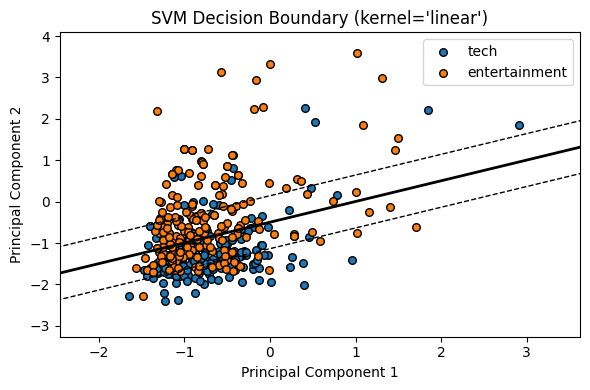

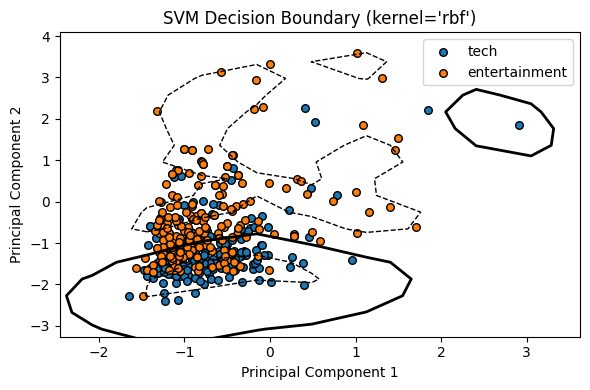

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Extract the target variable categories from the DataFrame
y = df['Category']

# Convert the sparse TF-IDF matrix to a dense array
X_dense = X_tfidf.toarray()

# Map categories to numeric codes for SVM compatibility
category_mapper = pd.Categorical(y)
y_numeric = category_mapper.codes  # Numeric encoding of categories
category_names = df['Category']  # Original category names

# Standardise the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

# Apply PCA to reduce dimensionality to 2 components for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define the penalty parameter for the SVM
C_penalty = 1

# Train a linear SVM on the PCA-transformed data
linear_svm = SVC(kernel='linear', C=C_penalty)
linear_svm.fit(X_pca, y)

# Define the gamma parameter for the RBF kernel
gamma = 1

# Train an RBF kernel SVM on the PCA-transformed data
rbf_svm = SVC(kernel='rbf', gamma=gamma)
rbf_svm.fit(X_pca, y)


# Function to plot the decision boundary of an SVM model
def plot_svc(model, X, y):
    plt.figure(figsize=(6, 4))

    # Plot the data points for each category
    unique_categories = np.unique(y)
    for category in unique_categories:
        plt.scatter(
            X[y == category, 0], X[y == category, 1],  # Select points for the current category
            label=category_names[category],  # Use category names for the legend
            s=30, edgecolors='k'  # Set marker size and edge color
        )
    
    # Get the current axis limits
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid to evaluate the decision function
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='solid', colors='k')  # Decision boundary
    plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles='dashed', colors='k')  # Margins

    # Adjust the plot limits to avoid clipping
    x_min, x_max = np.percentile(X[:, 0], [1, 99])
    y_min, y_max = np.percentile(X[:, 1], [1, 99])
    plt.xlim(x_min - 1, x_max + 1)
    plt.ylim(y_min - 1, y_max + 1)

    # Add labels, title and legend
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"SVM Decision Boundary (kernel='{model.kernel}')")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the decision boundary for the linear SVM
plot_svc(linear_svm, X_pca, y_numeric)

# Plot the decision boundary for the RBF kernel SVM
plot_svc(rbf_svm, X_pca, y_numeric)

## SVM

The penalty C on soft-margin decision boundaries controls the tradeoff between training error and maximising margin. 

Small C
- Lower penalty on misclassfiyed training points resulting in a wider margin
- Less sensitive to outliers and noisy data points
- Risk of underfitting as the model is too simple and general

Large C
- Greater penalty on misclassfiyed training points resulting in a tighter margin
- More sensitive to outliers and noisy data points
- Risk of overfitting as the model is to specific on training data

Small gamma
- Each training example has a large area of influence
- Decision boundary is smoother, more generalised and less complex
- Model aims for broad patterns potentially leading to underfitting

Large gamma
- Each training example has a very localised area of influence
- Decision boundary is highly complex and irregular
- Model focuses on local patterns, very prone to overfitting the training data

### (d) NN

In [368]:
# Code goes here

## Task 3: Classification Quality Evaluation

### (a) Training Set Size vs Accuracy

*For each model, we are evaluating how accuracy (F1 score) varies with training set size, and plotting all 4 models' curves on the same pair of plots (training and testing accuracy)*


In [369]:
# Code goes here

### (b) Hyperparameter Impact
*For each model, we are listing the major hyperparameters, assessing their impact (using CV) and comparing them as a set in our discussion*


In [370]:
# Code goes here

### (c) Best Results Comparison
*Here, after tuning, we are reporting and comparing the best performance (F1) of each model and summarizing which works best*